In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('C:/Users/Beinex/Downloads/00 LR/Positions_Salary.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, 1:2].values
y= data_set.iloc[:, 2].values

In [3]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [4]:
#Fitting the Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_regs= LinearRegression()
lin_regs.fit(x,y)

LinearRegression()

In [15]:
print(lin_regs.coef_)  # This will display the slope/coefficients of the linear regression line
print(lin_regs.intercept_)  # This will display the intercept of the linear regression line


[80878.78787879]
-195333.33333333337


In [5]:
 #Fitting the Polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree=4)
x_poly= poly_regs.fit_transform(x)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

In [6]:
print(lin_reg_2.coef_)  # Displays the coefficients of the polynomial regression model
print(lin_reg_2.intercept_)  # Displays the intercept of the polynomial regression model

[      0.         -211002.33100264   94765.44289054  -15463.2867133
     890.15151515]
184166.66666697623


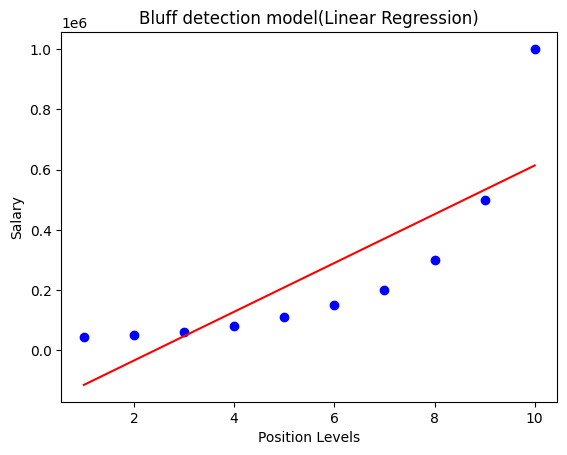

In [7]:
#Visulaizing the result for Linear Regression model
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_regs.predict(x), color="red")
mtp.title("Bluff detection model(Linear Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

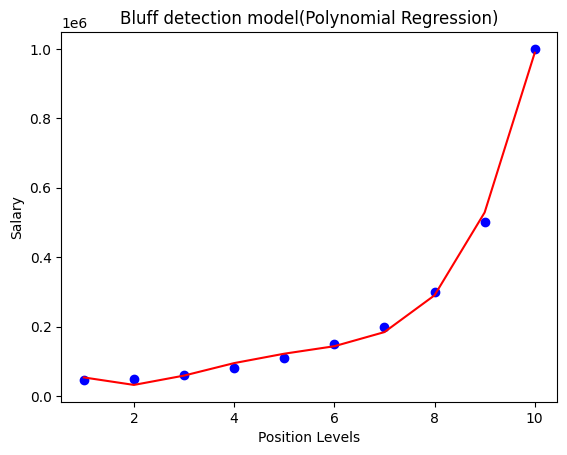

In [8]:
#Visulaizing the result for Polynomial Regression
mtp.scatter(x,y,color="blue")
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")
mtp.title("Bluff detection model(Polynomial Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

In [9]:
lin_pred = lin_regs.predict([[6.5]])
print(lin_pred)

[330378.78787879]


In [10]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))
print(poly_pred)

[158862.4526515]


In [11]:
# Applying regularization

from sklearn.linear_model import Lasso, Ridge

# Example of applying Lasso regression
lasso_reg = Lasso(alpha=0.1)  # Set the alpha/regularization parameter
lasso_reg.fit(x_poly, y)  # Fit Lasso regression using the polynomial features
lasso_pred = lasso_reg.predict(poly_regs.fit_transform([[6.5]]))  # Make predictions

# Example of applying Ridge regression
ridge_reg = Ridge(alpha=0.1)  # Set the alpha/regularization parameter
ridge_reg.fit(x_poly, y)  # Fit Ridge regression using the polynomial features
ridge_pred = ridge_reg.predict(poly_regs.fit_transform([[6.5]]))  # Make predictions

print(lasso_pred)
print(ridge_pred)


[136029.29557381]
[149764.34573627]


C:\Users\Beinex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.088e+09, tolerance: 8.066e+07
  model = cd_fast.enet_coordinate_descent(




*   For Lasso Regression: The predicted salary using Lasso regression for the given position level (6.5) is approximately $136,029.30.

*   For Ridge Regression: The predicted salary using Ridge regression for the same position level (6.5) is around $149,764.35.








Lasso tends to perform feature selection by enforcing some coefficients to be exactly zero, while Ridge regression typically shrinks the coefficients toward zero without making them exactly zero. Therefore, it affects the predictions differently, resulting in variations in predicted values for the same input.